In [ ]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display

import random

In [2]:
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

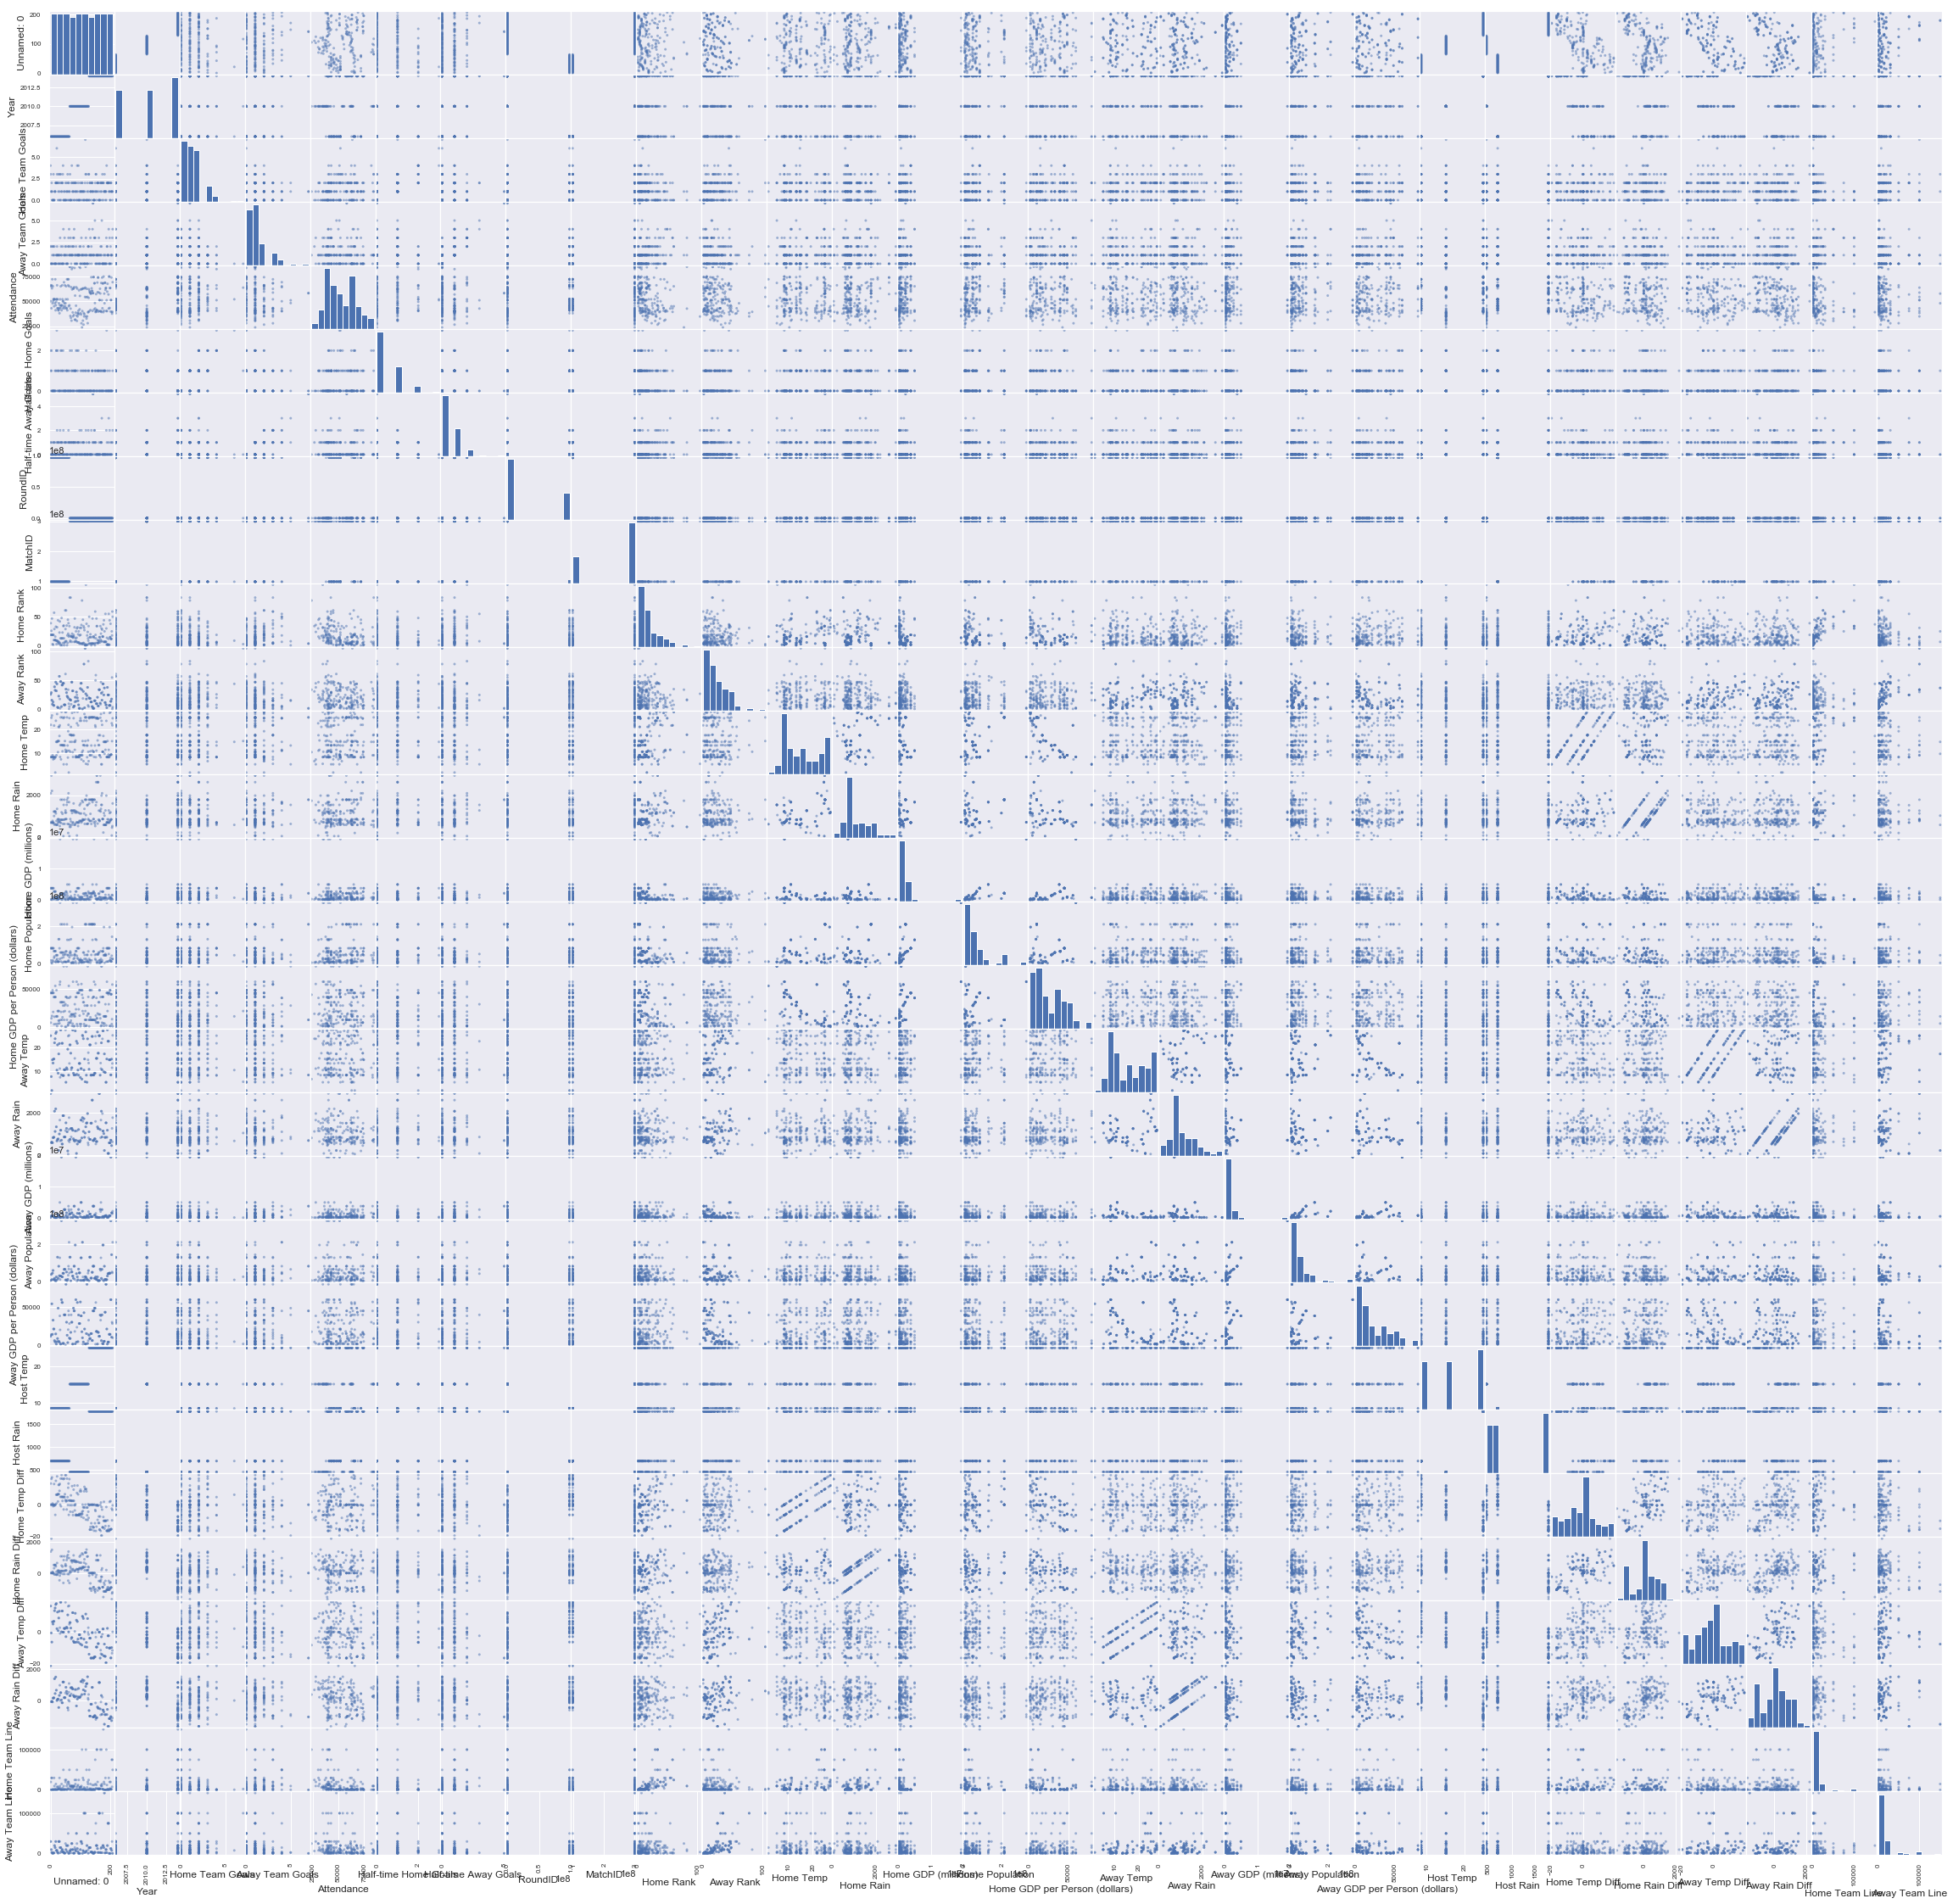

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train, figsize = (40,40))
plt.show()


In [3]:
columns_keep = [
    'Home Rank', 'Away Rank', 
    'Home GDP per Person (dollars)', 'Home GDP (millions)', 'Home Population', 'Home Temp Diff', 'Home Rain Diff',  
    'Away GDP per Person (dollars)', 'Away GDP (millions)', 'Away Population', 'Away Temp Diff', 'Away Rain Diff', 
]

In [5]:
X_train = data_train[columns_keep]
y_train = data_train['Home Team Result']
y_train_home = data_train['Home Team Goals']
y_train_away = data_train['Away Team Goals']

X_test = data_test[columns_keep]
y_test = data_test['Home Team Result']
y_test_home = data_test['Home Team Goals']
y_test_away = data_test['Away Team Goals']

In [6]:
def get_results(y_predict_home, y_predict_away):
    res = []
    for i in range(len(y_predict_home)):
        if y_predict_home[i] > y_predict_away[i]:
            res.append('W')
        elif y_predict_home[i] < y_predict_away[i]:
            res.append('L')
            
        else:
            res.append('D')
    
    return np.array(res)

**Baseline** (Higher FIFA Ranking Wins)

In [9]:
home_win = X_test['Home Rank'] > X_test['Away Rank']
y_predict_base = home_win.replace({True: 'W', False: 'L'})

In [10]:
accuracy_score(y_test, y_predict_base)

0.3125

**Logistic Regression

In [21]:
model_log = LogisticRegressionCV(cv = 5, max_iter = 10000)
log_fitted = model_log.fit(X_train, y_train)
predictions = log_fitted.predict(X_test)
accuracy_score(y_test, predictions)

/Users/wfinigan/anaconda/envs/cs109/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4375

**Home and Away Goals Model**

In [7]:
model_home = KNeighborsRegressor(n_neighbors=18)
model_away = KNeighborsRegressor(n_neighbors=18)

model_fit_home = model_home.fit(X_train, y_train_home)
model_fit_away = model_away.fit(X_train, y_train_away)


In [8]:
y_predict_home = model_fit_home.predict(X_test)
y_predict_away = model_fit_away.predict(X_test)

y_predict = get_results(y_predict_home, y_predict_away)

accuracy_score(y_test, y_predict)

0.484375

**Goal Differential Model**

In [11]:
X_train = data_train[columns_keep]
y_train_1= data_train['Home Team Goals'] - data_train['Away Team Goals']

X_test = data_test[columns_keep]
y_test_1 = data_test['Home Team Goals'] - data_test['Away Team Goals']

In [12]:
model = KNeighborsRegressor(n_neighbors=18)
model_fit = model.fit(X_train, y_train_1)
predictions = model_fit.predict(X_test)

def get_results_2(predictions):
    res = []
    for i in range(len(predictions)):
        if predictions[i] > 0:
            res.append('W')
        elif predictions[i] < 0:
            res.append('L')
            
        else:
            res.append('D')
    
    return np.array(res)

pred_array = get_results_2(predictions)
accuracy_score(y_test, pred_array)

0.484375